# **Problem Statement**

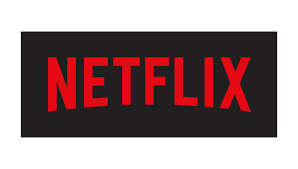

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

##  <font size="+2" color='#947318'> <b>1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')


##  <font size="+2" color='#947318'> <b>2. Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_path = "/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df = pd.read_csv(working_path)


##  <font size="+2" color='#947318'> <b>3. Basic Data Exploration 

### 3.1 df.head()

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### 3.2 df.shape

In [ ]:
df.shape

(7787, 12)

### 3.3 df.info()

In [ ]:
df.info(memory_usage = 'deep' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 7.5 MB


### 3.4 df.columns

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
DataInfoAll(df)

Dataset Shape: (7787, 12)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,show_id,object,0,7787,s1,s2
1,type,object,0,2,TV Show,Movie
2,title,object,0,7787,3%,7:19
3,director,object,2389,4049,NaN,Jorge Michel Grau
4,cast,object,718,6831,"João Miguel, Bianca Comparato, Michel Gomes, R...","Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
5,country,object,507,681,Brazil,Mexico
6,date_added,object,10,1565,"August 14, 2020","December 23, 2016"
7,release_year,int64,0,73,2020,2016
8,rating,object,7,14,TV-MA,TV-MA
9,duration,object,0,216,4 Seasons,93 min


### 3.5  Checking duplicate values

In [ ]:
df_duplicate = df[df.duplicated()]
print("Let's print all the duplicated rows as a dataframe")
df_duplicate

Let's print all the duplicated rows as a dataframe


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


* No duplicate values present in this dataset.

###  <font size="+2" color='#154085'> <b>4. Data Cleaning & Data Visualization

### 4.1 Checking NaN values

In [ ]:
NaN_Checker = pd.DataFrame({"No Of Total Values": df.shape[0] , "No of NaN values": df.isnull().sum(),
                    "%age of NaN values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

,No Of Total Values,No of NaN values,%age of NaN values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00


* **director** *column has highest NaN values 30.7% data is missing*
* **cast** *column has 9% NaN values*
* **country , date_added , rating** this columns also containing missing values


* Ploting the null values present in the dataset


In [ ]:
plot_nan = df.isna()
plot_nan.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

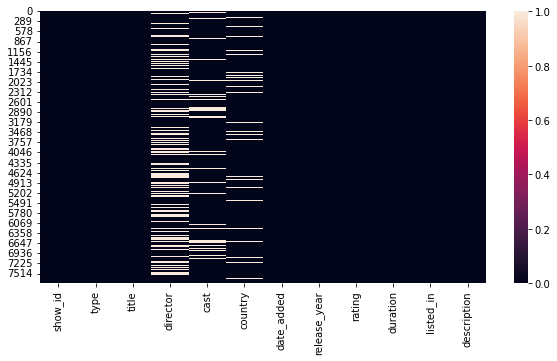

In [ ]:
plt.figure( figsize = (10 , 5))
sns.heatmap(plot_nan)

* Using barplot to check the no of NaN values present in this dataset

<BarContainer object of 12 artists>

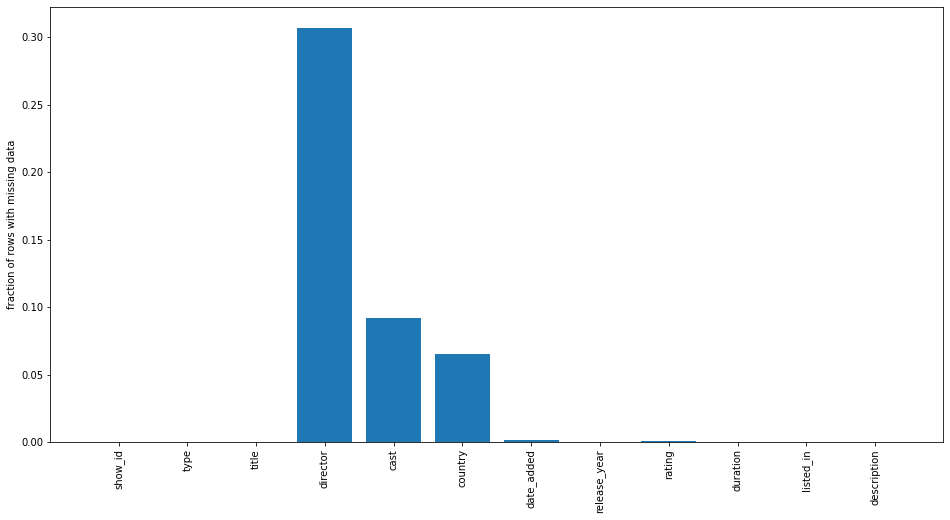

In [ ]:
# null value distribution
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

director and cast contains large number of null values so we will drop it


### 4.2 Dropping irrelevent features 

In [ ]:
df.drop(['director','cast'],axis=1, inplace=True)

### 4.3 Looking NaN values on data_added 

In [ ]:
data_added_NaN = df[df['date_added'].isna()]
data_added_NaN.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...


In [ ]:
data_added_NaN.shape

(10, 10)

* There are only 10 observations which are containing NaN values in *data_added* column

In [ ]:
print(f"Before dropping the NaN values from date_added the shape was {df.shape}")
df.dropna(subset = [ 'date_added' ], inplace = True)
print(f"After dropping the NaN values from date_added now the shape is {df.shape}")

Before dropping the NaN values from date_added the shape was (7787, 10)
After dropping the NaN values from date_added now the shape is (7777, 10)


### 4.4 Looking for unique values

In [ ]:
df.nunique()

show_id         7777
type               2
title           7777
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        491
description     7759
dtype: int64

* Unique values of *type* column

In [ ]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

* ### <b><i>4.5 Production Growth </b> based on type of the content & release_year  

In [ ]:
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

In [ ]:
yearly_movies.head()

2021     19
2020    457
2019    414
2018    386
2017    268
Name: release_year, dtype: int64

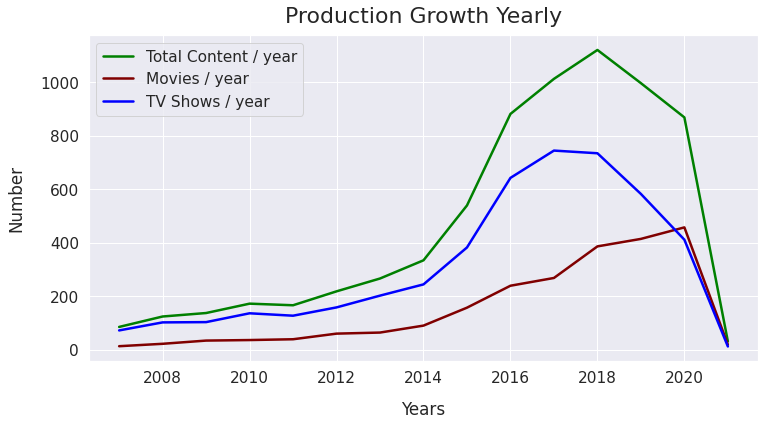

In [ ]:
sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(12, 6), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22);

* ### 4.6 **release_year**

* #### 4.6.1 Let's see all unique values present in *release_year* 

In [ ]:
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

* #### 4.6.2 Checking the Datatype of *release_year* column

In [ ]:
type(df['release_year'][0])

numpy.int64

* #### 4.6.3 value_count is on release_year

In [ ]:
df['release_year'].value_counts().to_frame().T

,2018,2017,2019,2016,2020,2015,2014,2013,2012,2010,...,1969,1963,1954,1970,1956,1925,1964,1966,1947,1959
release_year,1120,1012,996,881,868,539,334,266,218,172,...,2,2,2,2,2,1,1,1,1,1


* #### 4.6.4 Checking **outliers** on *release_year* column

<Axes: >

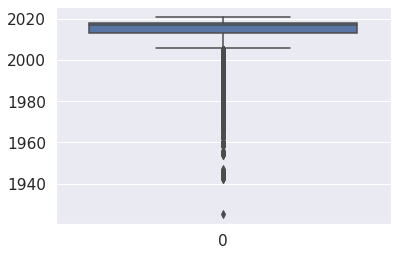

In [ ]:
sns.boxplot(df.release_year)

* As we have seen earlier **before 2014 the production growth for Movies & Tv Shows were very less** ,that's why it's showing those values*(release_year less than 2009)* as outliers 

In [ ]:
type(df.release_year[0])

numpy.int64

* #### 4.6.5 Replacing outliers with mean value

In [ ]:
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


* we don't have have any release_year which is greater than 2018

In [ ]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]                                            

In [ ]:
release_year_outliers

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,187,United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
44,s45,Movie,Æon Flux,United States,"February 1, 2018",2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an..."
94,s95,Movie,28 Days,United States,"September 30, 2020",2000,PG-13,104 min,"Comedies, Dramas",After her drunken antics result in property da...
97,s98,Movie,3 Deewarein,NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
105,s106,Movie,300 Miles to Heaven,"Denmark, France, Poland","October 1, 2019",1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br..."
...,...,...,...,...,...,...,...,...,...,...
7745,s7746,Movie,"Yours, Mine and Ours",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
7749,s7750,TV Show,Yu-Gi-Oh!,Japan,"July 8, 2020",2005,TV-Y7,2 Seasons,"Anime Series, Kids' TV",The lives of young Yugi Moto and his friends J...
7754,s7755,Movie,Yuva,India,"March 1, 2018",2004,TV-14,160 min,"Dramas, International Movies",An accident on a bridge ties together three yo...
7760,s7761,Movie,Zaki Chan,Egypt,"May 19, 2020",2005,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...


In [ ]:
# 15 percentile value is 2009
df["release_year"] = np.where(df["release_year"] <2009, df.release_year.mean(),df['release_year'])

* #### 4.6.6 Boxplot for release_year 

In [ ]:
df.release_year.describe()

count    7777.000000
mean     2016.260846
std         2.726841
min      2009.000000
25%      2013.935965
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

<Axes: >

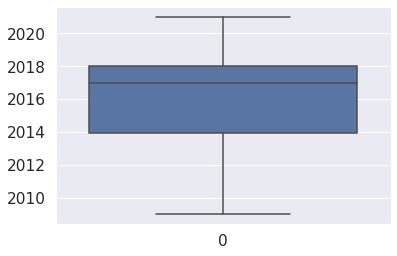

In [ ]:
sns.boxplot(df.release_year)

In [ ]:
print(f"Datatype of release_year = ",type(df.release_year.iloc[0]))
df.release_year = df.release_year.astype("int64")
print(f"Datatype of release_year = ",type(df.release_year.iloc[0]))

Datatype of release_year =  <class 'numpy.float64'>
Datatype of release_year =  <class 'numpy.int64'>


* ### <b>4.7 Title 

* #### 4.7.1 No of unique title present in title column

In [ ]:
df.title.nunique()

7777

In [ ]:
df.shape[0]

7777

* All the values present in Title are unique

* #### 4.7.2 Most occured word in *Title* ??

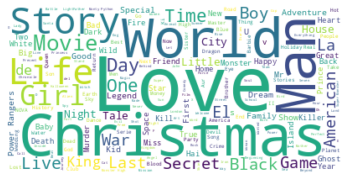

In [ ]:
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### **Inference:** 
<br>It seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles.

I have suprised to see "Christmas" ocuured so many time .
The reason maybe those movies released on the month of december, but I don't have any information about the release month of movies that's why I am not able to check my hypothesis.


### 4.8 **Countries** producing most number of contents

* #### 4.8.1 Checking no of unique values present in Country ?

In [ ]:
df.country.nunique()

681

* As you can see there are total 681 countries which are produce movies / tv shows

* #### 4.8.2 Using *value_counts()*

In [ ]:
df.country.value_counts().rename_axis('Country').reset_index(name='counts').T

,0,1,2,3,4,5,6,7,8,9,...,671,672,673,674,675,676,677,678,679,680
Country,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzer...","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmar..."
counts,2549,923,396,225,183,177,134,115,101,100,...,1,1,1,1,1,1,1,1,1,1


* #### 4.8.2 Check no of NaN values

In [ ]:
df.country.isna().sum()

506

* Let's replace those NaN values with mode value

In [ ]:
#mode value of country column
df.country.mode()[0]

'United States'

In [ ]:
df.country[df.country.isna()] = df.country.mode()[0]

In [ ]:
df.country[df.country.isna()]

Series([], Name: country, dtype: object)

In [ ]:
df.country.isna().sum()

0

* Now there is no NaN values present

* #### 4.8.3 Looking for countries and number of netflix productions

In [ ]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [ ]:
production_country[:5]

[('Bulgaria', 9, 0, 9),
 ('Ghana', 4, 0, 4),
 ('', 4, 0, 4),
 ('Iceland', 9, 2, 7),
 ('Ukraine', 3, 2, 1)]

* #### 4.8.4 Creating a new DataFrame *country_df*

In [ ]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [ ]:
#Top 5 countries
top_countries=country_df.head()
top_countries

,country,Productions,TV-Shows,Movies
0,United States,3797,1136,2661
1,India,990,75,915
2,United Kingdom,722,255,467
3,Canada,412,126,286
4,France,349,84,265


In [ ]:
top_countries.T

,0,1,2,3,4
country,United States,India,United Kingdom,Canada,France
Productions,3797,990,722,412,349
TV-Shows,1136,75,255,126,84
Movies,2661,915,467,286,265


<Axes: xlabel='country'>

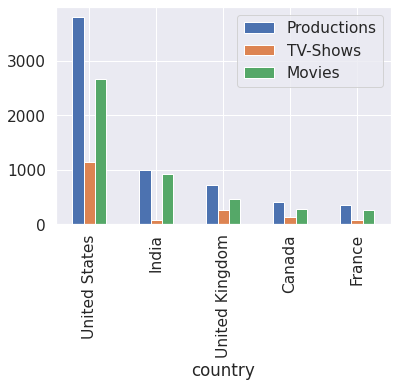

In [ ]:
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")

* ### 4.9 **Type** 

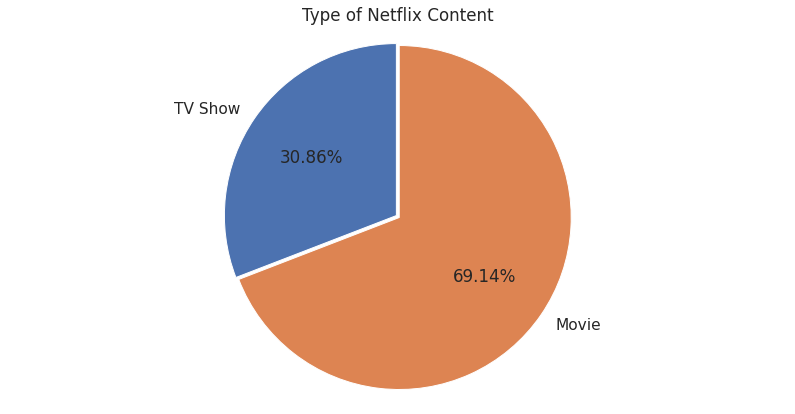

In [ ]:
#Plotting pie chart on type feature
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%', startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

* #### Most of the contents are Movies
* #### Less than ⅓ content are Tv Shows


* ### 4.10 **duration**

* #### 4.10.1 Checking NaN values

In [ ]:
df.duration.isna().sum()

0

* There is no NaN value present.

* #### 4.10.2 Checking datatype 

In [ ]:
type(df.duration.iloc[0][0])

str

* #### 4.10.3 How many unique values present in duration column ??

In [ ]:
df.duration.nunique()

216

* #### 4.10.4 Using *value_count()* method

In [ ]:
df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,13 Seasons,9 min,182 min,224 min,233 min,191 min
duration,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


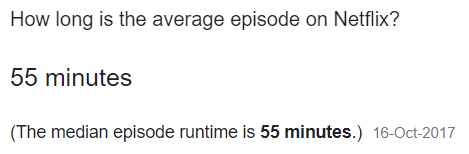

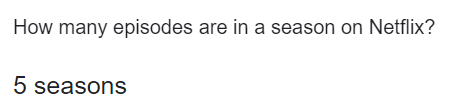

* #### 4.10.4 define *convert_seasons_to_min*

In [ ]:
def convert_seasons_to_min(value):
  """
  This function will calculate no of total mins as per season no.
  Here our assumptions are
    1. on average 5 episodes are there in a season.
    2. each episode avg time is 55 mins.
  """
  no_of_avg_episode = 5
  if "Seasons" in value:
    #containing more than 1 seasons
    value = value.replace("Seasons",'')
    value = value.replace(" ","")
    total_seasons = int(value)
    each_season_mins = ( no_of_avg_episode * 55 )
    total_mins = (total_seasons * each_season_mins)
    return total_mins

  elif "Season" in value:
    # containing only 1 season
    value = value.replace("Season",'')
    value = value.replace(" ","")
    total_mins = (no_of_avg_episode * 55)
    return total_mins

In [ ]:
#Checking the function
convert_seasons_to_min("4 Seasons")

1100

**"4 Seasons"** : <br>
4 Seasons = (4*5) or 20 episodes<br>
Each episode avg. time is 55 mins.<br>
Total time (in minutes. ) = (55*20) min<br> = 1100 mins
                         

* #### 4.10.5 define *all_the_duration_in_minutes*

In [ ]:
def all_the_duration_in_minutes():
  """
  This function will convert all the duration 
  whether it's in minutes or season format to minute
  """
  # replaced all the min with null string
  df['duration'] = df.duration.str.replace(" min" , "")
  # this time_list will contain all the value
  time_list =[]
  for time in df.duration.values:
    if "Season" in time:
      #time is containing Season
      # calling convert_seasons_to_min function to convert 
      # season to total min 
      time = convert_seasons_to_min(time)
    else:
      #replacing single space with ""
      time = time.replace(" ","")
    #appending time (it's not containing words like min or seasons)
    time_list.append(time)

  #converting all the time into integer format
  time_list = [ int(Time) for Time in time_list]

  #Assigning time_list to df.duration
  df.duration = time_list 

In [ ]:
df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,13 Seasons,9 min,182 min,224 min,233 min,191 min
duration,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
all_the_duration_in_minutes()

In [ ]:
df.duration.value_counts().to_frame().T

,275,550,825,90,93,94,91,95,92,97,...,193,13,214,8,3575,9,182,224,233,191
duration,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


* #### 4.10.6 Analysis on the duration of the movies

<Axes: xlabel='duration', ylabel='Density'>

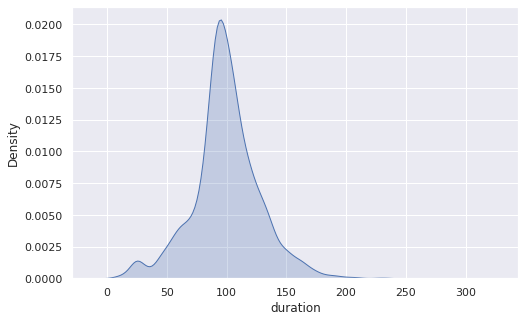

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
sns.kdeplot(data = df.duration[df['type'] == 'Movie'] , shade=True)

* Most content are about 70 to 120 min duration for movies

* #### 4.10.7 Analysis on the duration of the TV-Shows

In [ ]:
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

<Axes: xlabel='duration', ylabel='Density'>

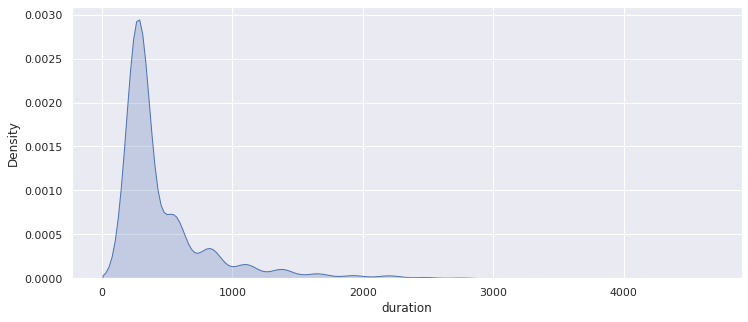

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize = (12,5))
sns.kdeplot(data = df.duration[df['type'] == 'TV Show'] , shade=True)

### 4.11 **listed_in**

* #### 4.11.1 How many unique values present in listed_in ??

In [ ]:
df.listed_in.nunique()

491

There are all total 491 unique values present

* #### 4.11.2 How many NaN values present in *listed_in* ?

In [ ]:
df.listed_in.isna().sum()

0

There is no NaN values present

* #### 4.11.2 Value_counts()

In [ ]:
df.listed_in.value_counts().to_frame().T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
listed_in,334,321,320,243,215,204,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


* #### 4.11.3 Making **Categories**

In [ ]:
categories = ", ".join(df['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [ ]:
len(categories)

17051

In [ ]:
len(set(categories))

42

There are **42 unique categories**  present & in this dataset **all the categories occured in total 17051 times**

Creating a dictionary **( *category_wise_count* )** where for each category there will be a value which basically tells us how many times that particular category occured

In [ ]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [ ]:
category_wise_count

{'TV Dramas': 703,
 'Sci-Fi & Fantasy': 218,
 'Comedies': 1471,
 'Science & Nature TV': 85,
 'TV Shows': 12,
 'Stand-Up Comedy': 329,
 'Horror Movies': 312,
 'TV Sci-Fi & Fantasy': 75,
 'Cult Movies': 59,
 'TV Action & Adventure': 149,
 'Teen TV Shows': 60,
 'Crime TV Shows': 426,
 'LGBTQ Movies': 90,
 'Romantic Movies': 531,
 'Movies': 56,
 'Children & Family Movies': 532,
 'Stand-Up Comedy & Talk Shows': 52,
 'TV Horror': 69,
 "Kids' TV": 412,
 'Independent Movies': 673,
 'Music & Musicals': 321,
 'Faith & Spirituality': 57,
 'Documentaries': 786,
 'Classic & Cult TV': 25,
 'International TV Shows': 1198,
 'Sports Movies': 196,
 'Korean TV Shows': 150,
 'Spanish-Language TV Shows': 146,
 'Romantic TV Shows': 333,
 'Docuseries': 352,
 'Classic Movies': 103,
 'Anime Features': 57,
 'Anime Series': 147,
 'TV Mysteries': 90,
 'Dramas': 2106,
 'International Movies': 2437,
 'Reality TV': 222,
 'Thrillers': 491,
 'TV Thrillers': 50,
 'British TV Shows': 231,
 'TV Comedies': 518,
 'Action &

* Sorting *category_wise_count* by value

In [ ]:
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:4]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52)]

* Top 5 least occurred category

In [ ]:
sorted_category_wise_count[:5]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52),
 ('Movies', 56)]

* Top 5 most occurred category 

In [ ]:
sorted_category_wise_count[-5:]

[('Documentaries', 786),
 ('International TV Shows', 1198),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

* Top 10 most occurred categories 

In [ ]:
 top_10_most_occurred_categories = sorted_category_wise_count[-10:]

In [ ]:
top_10_most_occurred_categories

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 703),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1198),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

In [ ]:
top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_most_occurred_categories:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])

In [ ]:
top_10_most_occurred_category_name

['Romantic Movies',
 'Children & Family Movies',
 'Independent Movies',
 'TV Dramas',
 'Action & Adventure',
 'Documentaries',
 'International TV Shows',
 'Comedies',
 'Dramas',
 'International Movies']

In [ ]:
top_10_most_occurred_category_count

[531, 532, 673, 703, 721, 786, 1198, 1471, 2106, 2437]

* #### 4.11.4 **TOP 10 Most Occurred Category By Count**

<Figure size 1152x576 with 0 Axes>

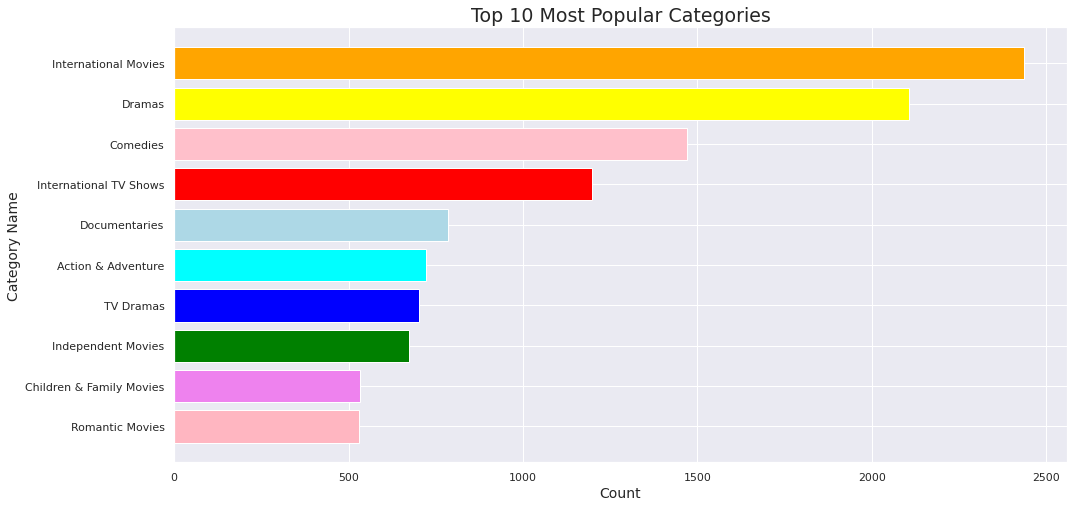

<Figure size 1152x576 with 0 Axes>

In [ ]:
plt.figure( figsize = (16,8))
color=['lightpink', 'violet', 'green', 'blue', 'cyan' , "lightblue" ,'red', 'pink', 'yellow', 'orange']
plt.barh(top_10_most_occurred_category_name , top_10_most_occurred_category_count ,
        color= color)
plt.title("Top 10 Most Popular Categories",fontsize = 19)
plt.xlabel("Count", fontsize = 14 )
plt.ylabel("Category Name" , fontsize = 14 )
plt.figure( figsize = (16,8))

* #### 4.11.5 Creating a new column **no_of_category**

* Datatype of listed_in values

In [ ]:
type(df.listed_in.iloc[0])

str

In [ ]:
(df.listed_in.iloc[0])

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [ ]:
(df.listed_in.iloc[0]).split(",")

['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [ ]:
len((df.listed_in.iloc[0]).split(","))

3

In [ ]:
no_of_category = []
for categories in df.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)

In [ ]:
df['no_of_category'] = no_of_category

In [ ]:
df[['listed_in' , 'no_of_category']].head()

,listed_in,no_of_category
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
1,"Dramas, International Movies",2
2,"Horror Movies, International Movies",2
3,"Action & Adventure, Independent Movies, Sci-Fi...",3
4,Dramas,1


* #### 4.11.6 Histogram of *no_of_category* using *listed_in*

In [ ]:
df.no_of_category.unique()

array([3, 2, 1])

In [ ]:
df.no_of_category.value_counts()

3    3295
2    2684
1    1798
Name: no_of_category, dtype: int64

Text(0, 0.5, 'Count')

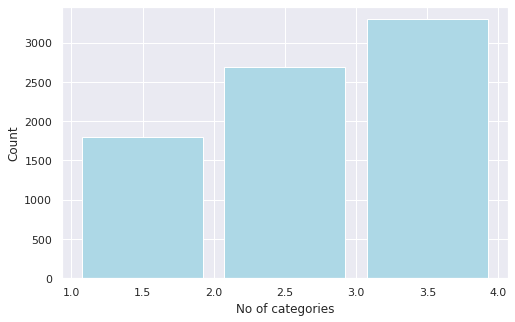

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
plt.hist(df.no_of_category , bins=[1,2,3,4] , range = (1 ,4) , rwidth = 0.85, color ='lightblue')
plt.xlabel("No of categories")
plt.ylabel("Count")

* ### 4.12 Creating a new column **date_added_month** using *date_added* column

In [ ]:
df.date_added.head(3)

0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
Name: date_added, dtype: object

In [ ]:
df['date_added_month'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df[['date_added' , 'date_added_month']].head()

,date_added,date_added_month
0,"August 14, 2020",August
1,"December 23, 2016",December
2,"December 20, 2018",December
3,"November 16, 2017",November
4,"January 1, 2020",January


In [ ]:
month_df=df['date_added_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
ab = month_df.loc[0:11]
ab

,Month_Name,date_added_month
0,December,817
1,October,780
2,January,746
3,November,730
4,March,661
5,September,614
6,August,612
7,April,596
8,July,592
9,June,538


In [ ]:
month_names = ab.Month_Name.values
month_wise_count = ab.date_added_month.values

Text(0, 0.5, 'Count')

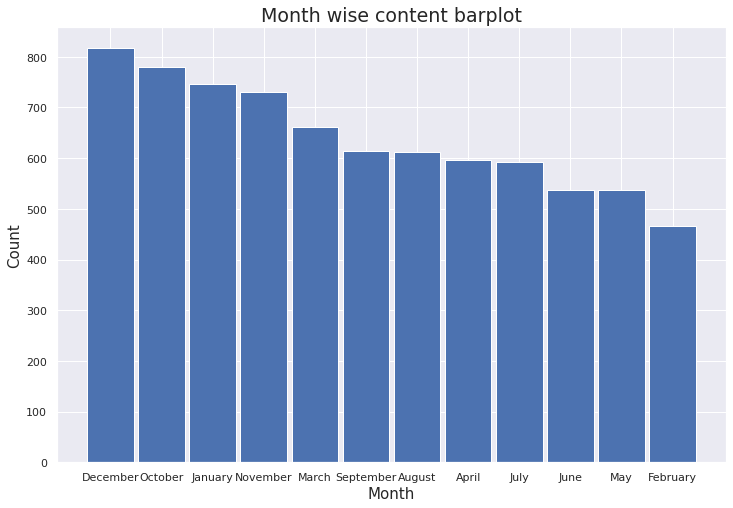

In [ ]:
plt.figure(figsize = (12 ,8 ))
plt.bar(month_names , month_wise_count, width = 0.91)
plt.title("Month wise content barplot" , fontsize = 19)
plt.xlabel("Month" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)

* We can say that December is the holiday season and it also has Christmas, so in that month most of the content got uploaded.


In [ ]:
df.date_added_month.value_counts().to_frame().T

,December,October,January,November,March,September,August,April,July,June,May,February,
date_added_month,817,780,746,730,661,614,612,596,592,538,537,466,88


* ### 4.13 **show_id**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month'],
      dtype='object')

* #### 4.13.1 Checking NaN values

In [ ]:
df.show_id.isna().sum()

0

There is no NaN value present in show_id

* #### 4.13.2 Using *value_counts()*

In [ ]:
df.show_id.value_counts()

s1       1
s5175    1
s5203    1
s5202    1
s5201    1
        ..
s2594    1
s2593    1
s2592    1
s2591    1
s7787    1
Name: show_id, Length: 7777, dtype: int64

In [ ]:
df.shape[0]

7777

All the *show_id* is **unique**

* #### 4.13.3 Checking datatype

In [ ]:
type(df.show_id.iloc[0])

str

In [ ]:
df.rating.value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

* #### 4.13.4 Most popular *TV-Shows Rating* 

In [ ]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [ ]:
df_tv_show = df[df['type']== 'TV Show' ]
df_tv_show.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
5,s6,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,275,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,3,July


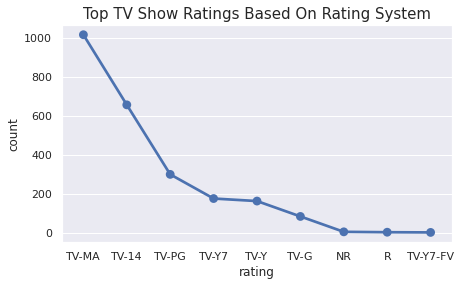

In [ ]:
#Pointplot on top tv show ratings 
tv_ratings = df_tv_show.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()

* #### 4.13.5 Most popular *Movies Rating* 

In [ ]:
df_movies = df[df['type'] == 'Movie' ]
df_movies.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2,December


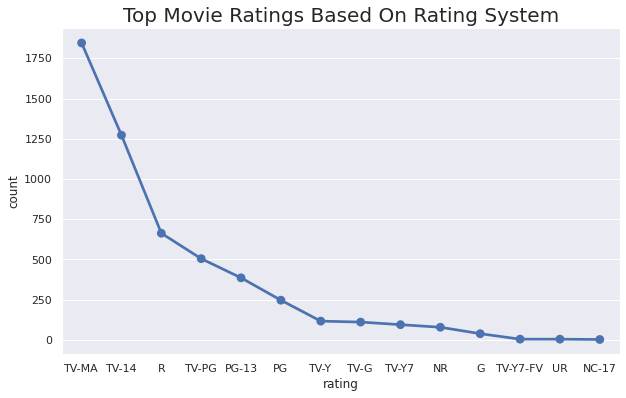

In [ ]:
#Pointplot on top tv show ratings 
tv_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (10,6)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

Most of the contents got ratings like
* TV-MA (For Mature Audiences)
* TV-14 ( May be unsuitable for children under 14 )
* TV-PG ( Parental Guidance Suggested  )
* NR ( Not Rated )


## <font size="+2" color='#154085'><b>5. Data Prepreation *(nlp data)*

### 5.1 **description**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month'],
      dtype='object')

In [ ]:
df.description.iloc[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [ ]:
First_des = df.description.iloc[0]
First_des

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

* #### 5.1.1 Importing necessary libraries

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

Now all the values of description are punctutation free ans stopword free

* #### 5.1.2Using **CountVectorizer()** to count vocabulary items

In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

dict_items([('in', 8842), ('future', 7186), ('where', 19172), ('the', 17561), ('elite', 5671), ('inhabit', 8993), ('an', 947), ('island', 9271), ('paradise', 12740), ('far', 6427), ('from', 7104), ('crowded', 4252), ('slums', 16161), ('you', 19577), ('get', 7382), ('one', 12363), ('chance', 3082), ('to', 17769), ('join', 9491), ('saved', 15263), ('squalor', 16579), ('after', 642), ('devastating', 4847), ('earthquake', 5520), ('hits', 8351), ('mexico', 11153), ('city', 3348), ('trapped', 17994), ('survivors', 17128), ('all', 787), ('walks', 18956), ('of', 12263), ('life', 10221), ('wait', 18933), ('be', 1799), ('rescued', 14579), ('while', 19178), ('trying', 18136), ('desperately', 4800), ('stay', 16688), ('alive', 786), ('when', 19170), ('army', 1232), ('recruit', 14299), ('is', 9261), ('found', 6968), ('dead', 4514), ('his', 8326), ('fellow', 6553), ('soldiers', 16287), ('are', 1190), ('forced', 6904), ('confront', 3802), ('terrifying', 17504), ('secret', 15451), ('thats', 17559), ('h

In [ ]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

* Creating a new *DataFrame* **vocab_before_stemming**

In [ ]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [ ]:
vocab_before_stemming.head(4)

,Word,count
18965,şeref,19702
10496,ōarai,19701
12484,łukasz,19700
11207,überelite,19699


In [ ]:
vocab_before_stemming.head(20).T

,18965,10496,12484,11207,11779,13395,6685,18304,10534,9973,19664,6637,19699,16522,7297,18506,19689,19696,10399,18180
Word,şeref,ōarai,łukasz,überelite,über,ömer,émile,ángel,álvaro,álex,zé,zurich,zumbo,zulu,zuhu,zuckerberg,zoé,zozo,zoya,zorro
count,19702,19701,19700,19699,19698,19697,19696,19695,19694,19693,19692,19691,19690,19689,19688,19687,19686,19685,19684,19683


In [ ]:
vocab_before_stemming.tail(4)

,Word,count
706,100,3
7722,10,2
8068,009,1
6972,007,0


* TOP 10 most occurred words

In [ ]:
top15_most_ocurred_vacab = vocab_before_stemming.head(15)

In [ ]:
top15_most_occurred_words = top15_most_ocurred_vacab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [ ]:
top15_most_occurred_words_count = top15_most_ocurred_vacab['count'].values 
top15_most_occurred_words_count

array([19702, 19701, 19700, 19699, 19698, 19697, 19696, 19695, 19694,
       19693, 19692, 19691, 19690, 19689, 19688])

<BarContainer object of 15 artists>

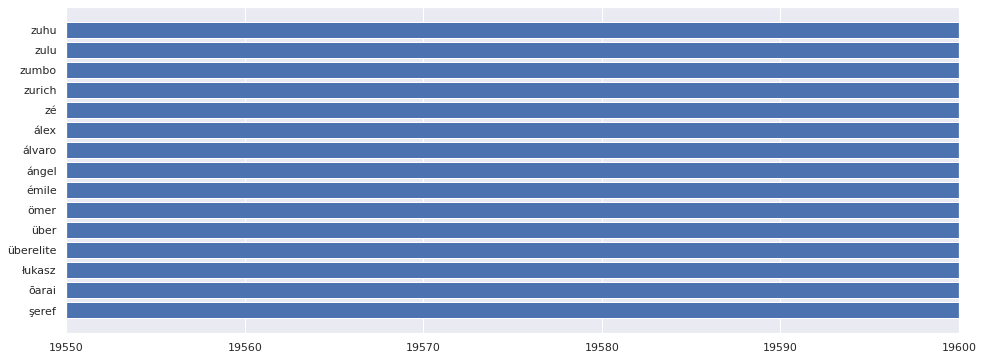

In [ ]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(19550, 19600)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

* #### 5.1.3 Now will use **SnowballStemmer( 'english' )**

In [ ]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [ ]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
#Stemming for description
df['description'] = df['description'].apply( Apply_stemming )
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",in a futur where the elit inhabit an island pa...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",after a devast earthquak hit mexico citi trap ...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",when an armi recruit is found dead his fellow ...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",in a postapocalypt world ragdol robot hide in ...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,a brilliant group of student becom cardcount e...,1,January


* #### 5.1.4 Now again will use **TfidfVectorizer** *(after stemming)*

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

* Creating a new *DataFrame* **vocab_after_stemming**

In [ ]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [ ]:
top15_most_ocurred_vocab = vocab_after_stemming.head(15)

In [ ]:
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [ ]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values 
top15_most_occurred_words_count

array([14327, 14326, 14325, 14324, 14323, 14322, 14321, 14320, 14319,
       14318, 14317, 14316, 14315, 14314, 14313])

<BarContainer object of 15 artists>

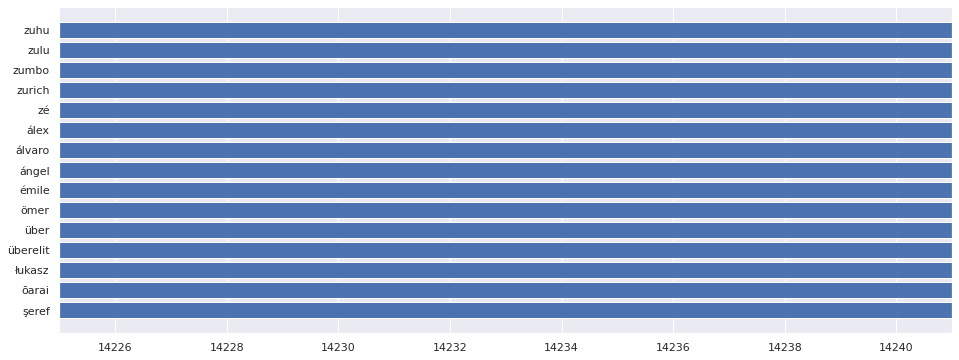

In [ ]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(14225, 14241)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

* #### 5.1.5 Adding a new column **length** which will contain length of description

In [ ]:
df['Length(description)'] = df['description'].apply(lambda x: len(x))

In [ ]:
df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",in a futur where the elit inhabit an island pa...,3,August,125
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",after a devast earthquak hit mexico citi trap ...,2,December,123
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",when an armi recruit is found dead his fellow ...,2,December,132


In [ ]:
df.description.iloc[0]

'in a futur where the elit inhabit an island paradis far from the crowd slum you get one chanc to join the 3 save from squalor'

In [ ]:
len(df.description.iloc[0])

125

* ### 5.2 **listed_in**

* #### 5.2.1 Removing punctutations

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month', 'Length(description)'],
      dtype='object')

In [ ]:
df['listed_in'] = df['listed_in'].apply(remove_punctuation)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,International TV Shows TV Dramas TV SciFi Fan...,in a futur where the elit inhabit an island pa...,3,August,125
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,Dramas International Movies,after a devast earthquak hit mexico citi trap ...,2,December,123
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,Horror Movies International Movies,when an armi recruit is found dead his fellow ...,2,December,132
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,Action Adventure Independent Movies SciFi Fa...,in a postapocalypt world ragdol robot hide in ...,3,November,126
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,a brilliant group of student becom cardcount e...,1,January,126


* #### 5.2.2 Removing stopwords

In [ ]:
#Remove stopwords for listed_in
df['listed_in'] = df['listed_in'].apply( remove_stopwords )
df.head( 2 )

NameError: ignored

* #### 5.2.3 Using **CountVectorizer()** to count vocabulary items

In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

dict_items([('international', 19), ('tv', 41), ('shows', 33), ('dramas', 12), ('scifi', 31), ('fantasy', 15), ('movies', 23), ('horror', 17), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 26), ('thrillers', 40), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 36), ('comedies', 6), ('anime', 2), ('series', 32), ('reality', 28), ('romantic', 29), ('science', 30), ('nature', 27), ('british', 3), ('korean', 21), ('music', 24), ('musicals', 25), ('lgbtq', 22), ('faith', 13), ('spirituality', 35), ('kids', 20), ('spanishlanguage', 34), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 37), ('comedy', 7), ('talk', 38), ('teen', 39), ('features', 16)])

In [ ]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [ ]:
listed_in_vocab_before_stem = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})

listed_in_vocab_before_stem = listed_in_vocab_before_stem.sort_values("count" ,ascending=False)

In [ ]:
listed_in_vocab_before_stem.head()

,Word,count
1,tv,41
12,thrillers,40
40,teen,39
39,talk,38
37,standup,37


In [ ]:
listed_in_vocab_before_stem.tail()

,Word,count
33,children,4
24,british,3
18,anime,2
9,adventure,1
8,action,0


* TOP 10 most occurred words in listed in

In [ ]:
top15_most_ocurred_vocab_listed_in = listed_in_vocab_before_stem.head(15)

In [ ]:
top15_most_ocurred_words_listed_in = top15_most_ocurred_vocab_listed_in.Word.values 
top15_most_ocurred_words_listed_in

array(['tv', 'thrillers', 'teen', 'talk', 'standup', 'sports',
       'spirituality', 'spanishlanguage', 'shows', 'series', 'scifi',
       'science', 'romantic', 'reality', 'nature'], dtype=object)

In [ ]:
top15_most_occurred_words_in_listed_in_count = top15_most_ocurred_vocab_listed_in['count'].values 
top15_most_occurred_words_in_listed_in_count

array([41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27])

<BarContainer object of 15 artists>

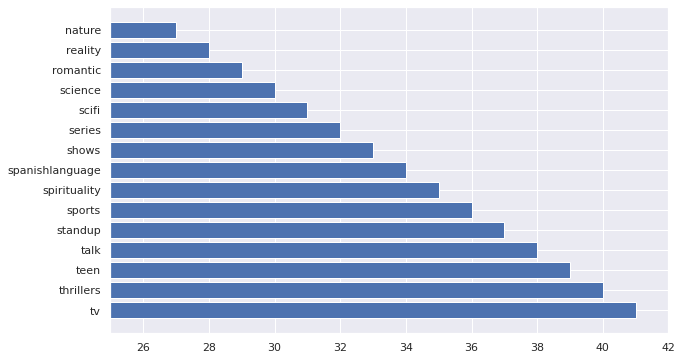

In [ ]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 42 )
plt.barh(top15_most_ocurred_words_listed_in , top15_most_occurred_words_in_listed_in_count )

* #### 5.2.4 Now will use **SnowballStemmer( 'english' )**

In [ ]:
#Stemming for description
df['listed_in'] = df['listed_in'].apply( Apply_stemming )
df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,intern tv show tv drama tv scifi fantasi,in a futur where the elit inhabit an island pa...,3,August,125
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,drama intern movi,after a devast earthquak hit mexico citi trap ...,2,December,123
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,horror movi intern movi,when an armi recruit is found dead his fellow ...,2,December,132


* #### 5.2.5 Now will use **TfidfVectorizer** *(after stemming)*

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
dictionary

dict_items([('intern', 18), ('tv', 39), ('show', 31), ('drama', 11), ('scifi', 29), ('fantasi', 14), ('movi', 22), ('horror', 16), ('action', 0), ('adventur', 1), ('independ', 17), ('mysteri', 24), ('thriller', 38), ('crime', 7), ('docuseri', 10), ('documentari', 9), ('sport', 34), ('comedi', 6), ('anim', 2), ('seri', 30), ('realiti', 26), ('romant', 27), ('scienc', 28), ('natur', 25), ('british', 3), ('korean', 20), ('music', 23), ('lgbtq', 21), ('faith', 12), ('spiritu', 33), ('kid', 19), ('spanishlanguag', 32), ('children', 4), ('famili', 13), ('classic', 5), ('cult', 8), ('standup', 35), ('talk', 36), ('teen', 37), ('featur', 15)])

In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

* Creating a new *DataFrame* **vocab_after_stemming_listed_in**

In [ ]:
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
# Sort the dataframe by count
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

In [ ]:
top15_most_ocurred_vocab_lised_in_after_stem = vocab_after_stemming_listed_in.head(15)

In [ ]:
top15_most_ocurred_vocab_lised_in_after_stem_word = top15_most_ocurred_vocab_lised_in_after_stem.Word.values 
top15_most_ocurred_vocab_lised_in_after_stem_word

array(['tv', 'thriller', 'teen', 'talk', 'standup', 'sport', 'spiritu',
       'spanishlanguag', 'show', 'seri', 'scifi', 'scienc', 'romant',
       'realiti', 'natur'], dtype=object)

In [ ]:
top15_most_occurred_words_listed_in_count = top15_most_ocurred_vocab_lised_in_after_stem['count'].values 
top15_most_occurred_words_listed_in_count

array([39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25])

* Plot of the top vocab present in listed_in (after stemming) 

<BarContainer object of 15 artists>

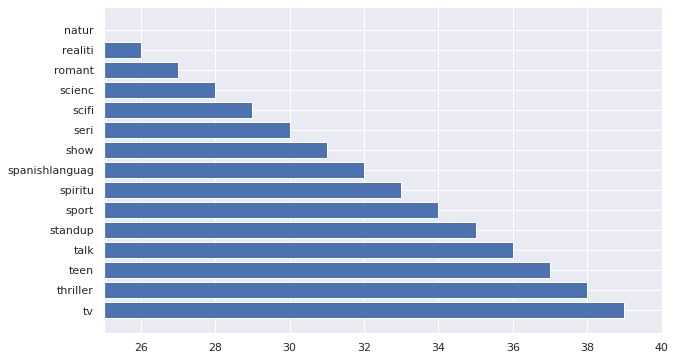

In [ ]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 40 )
plt.barh(top15_most_ocurred_vocab_lised_in_after_stem_word , top15_most_occurred_words_listed_in_count )

* #### 5.2.6 Adding a new column **length( listed-in )** which will contain length of listed_in

In [ ]:
df['Length(listed-in)'] = df['listed_in'].apply(lambda x: len(x))
df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description),Length(listed-in)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,intern tv show tv drama tv scifi fantasi,in a futur where the elit inhabit an island pa...,3,August,125,40
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,drama intern movi,after a devast earthquak hit mexico citi trap ...,2,December,123,17
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,horror movi intern movi,when an armi recruit is found dead his fellow ...,2,December,132,23


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month', 'Length(description)', 'Length(listed-in)'],
      dtype='object')

In [ ]:
df[['description', 'Length(description)', 'listed_in' ,'Length(listed-in)' ]].head(3)

,description,Length(description),listed_in,Length(listed-in)
0,in a futur where the elit inhabit an island pa...,125,intern tv show tv drama tv scifi fantasi,40
1,after a devast earthquak hit mexico citi trap ...,123,drama intern movi,17
2,when an armi recruit is found dead his fellow ...,132,horror movi intern movi,23


* ## <b>6. Applying Different Clustering Algorithms

<b><u>Clustering</b></u>: -<br>
Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data.A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

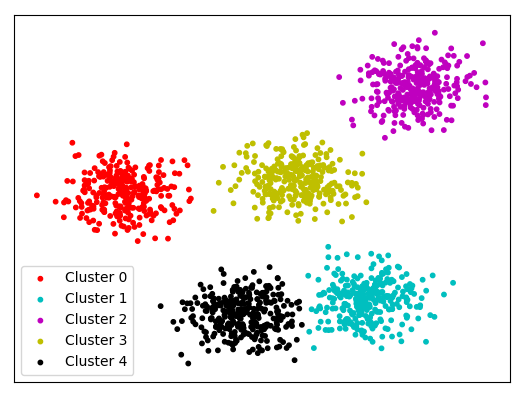

* ## <b>Five*(5)* Clustering algo I have used
* ### <b>1. Silhouette score
* ### <b> 2. Elbow Method
* ### <b>3. DBSCAN
* ### <b>4. Dendrogram
* ### <b> 5. AgglomerativeClustering

* ### <b>6.1 Silhouette score

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month', 'Length(description)', 'Length(listed-in)'],
      dtype='object')

In [ ]:
X_features_rec = df[['no_of_category' ,'Length(description)','Length(listed-in)']]
stdscaler = preprocessing.StandardScaler()

In [ ]:
X_features_rec.describe()

,no_of_category,Length(description),Length(listed-in)
count,7777.000000,7777.000000,7777.000000
mean,2.192491,127.249839,24.328019
std,0.786070,10.667520,10.685483
min,1.000000,51.000000,4.000000
25%,2.000000,123.000000,17.000000
50%,2.000000,129.000000,24.000000
75%,3.000000,133.000000,32.000000
max,3.000000,229.000000,62.000000


In [ ]:
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [ ]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.44769165541886674
For n_clusters = 3, silhouette score is 0.4074697910142764
For n_clusters = 4, silhouette score is 0.42496028856865714
For n_clusters = 5, silhouette score is 0.43678777424940046
For n_clusters = 6, silhouette score is 0.4296354188487208
For n_clusters = 7, silhouette score is 0.4129101169452755
For n_clusters = 8, silhouette score is 0.39675748331568994
For n_clusters = 9, silhouette score is 0.3895129863580282
For n_clusters = 10, silhouette score is 0.37589782857995974
For n_clusters = 11, silhouette score is 0.3736759788818322
For n_clusters = 12, silhouette score is 0.3525129132853854
For n_clusters = 13, silhouette score is 0.3435383170181803
For n_clusters = 14, silhouette score is 0.3443101405599111
For n_clusters = 15, silhouette score is 0.3412760307765965


In [ ]:
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(14)

,n clusters,silhouette score
0,2,0.448
3,5,0.437
4,6,0.430
2,4,0.425
5,7,0.413
1,3,0.407
6,8,0.397
7,9,0.390
8,10,0.376
9,11,0.374


* <b>NOTE :-</b><br>
The value of the silhouette coefﬁcient is between [-1, 1]. **A score of 1 denotes the best meaning that the data point i is very compact within the cluster** to which it belongs and far away from the other clusters. *The worst value is -1*. Values near 0 denote overlapping clusters

For n_clusters = 2 The average silhouette_score is : 0.44769165541886674
For n_clusters = 3 The average silhouette_score is : 0.4074697910142764
For n_clusters = 4 The average silhouette_score is : 0.4253377646956864
For n_clusters = 5 The average silhouette_score is : 0.4366103389557836
For n_clusters = 6 The average silhouette_score is : 0.4296684238556285
For n_clusters = 7 The average silhouette_score is : 0.4126285393934738
For n_clusters = 8 The average silhouette_score is : 0.40093781228912134
For n_clusters = 9 The average silhouette_score is : 0.3899110549151895
For n_clusters = 10 The average silhouette_score is : 0.37647536591286107
For n_clusters = 11 The average silhouette_score is : 0.3690429592459066
For n_clusters = 12 The average silhouette_score is : 0.3474233080575809
For n_clusters = 13 The average silhouette_score is : 0.34539079871240497
For n_clusters = 14 The average silhouette_score is : 0.3408541469207134
For n_clusters = 15 The average silhouette_score is : 0

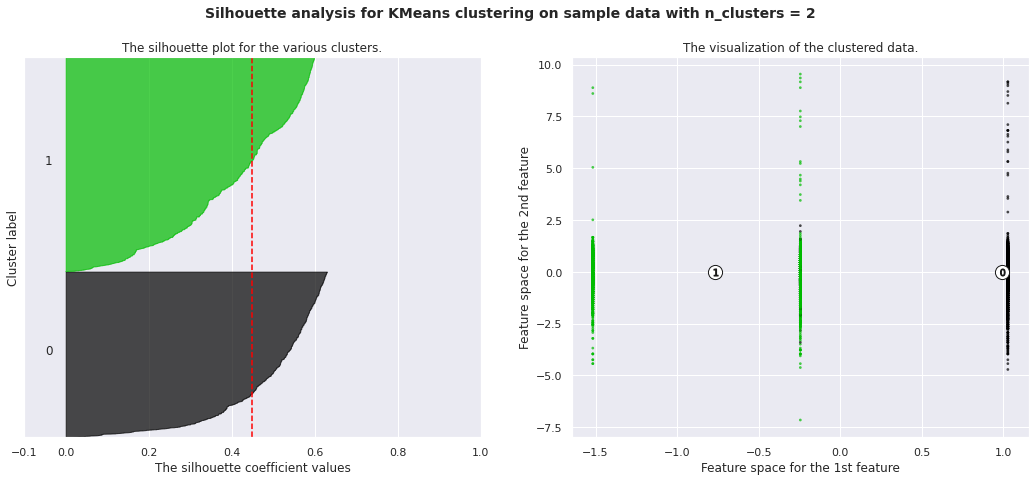

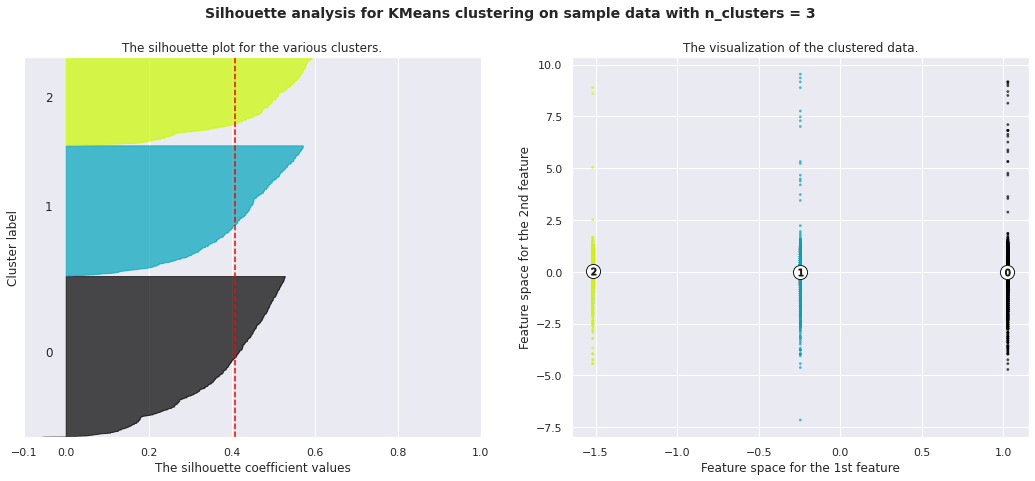

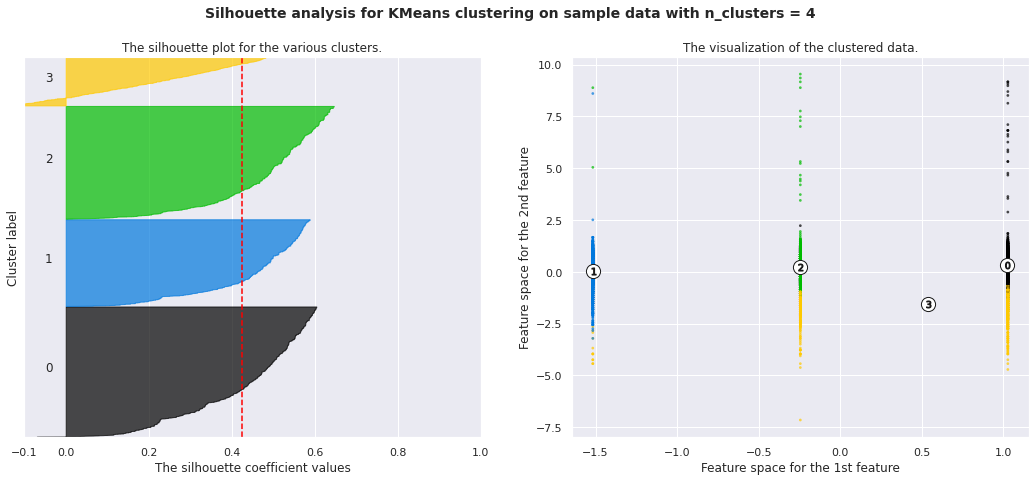

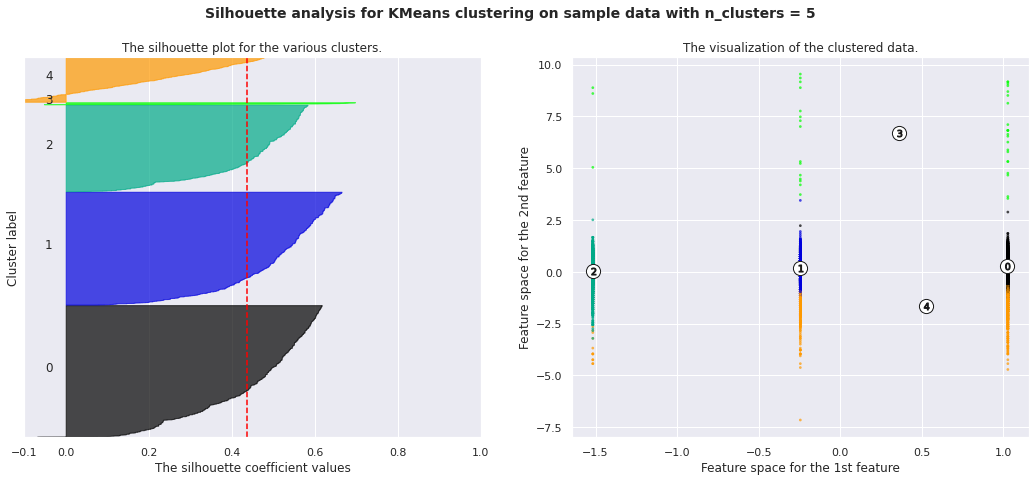

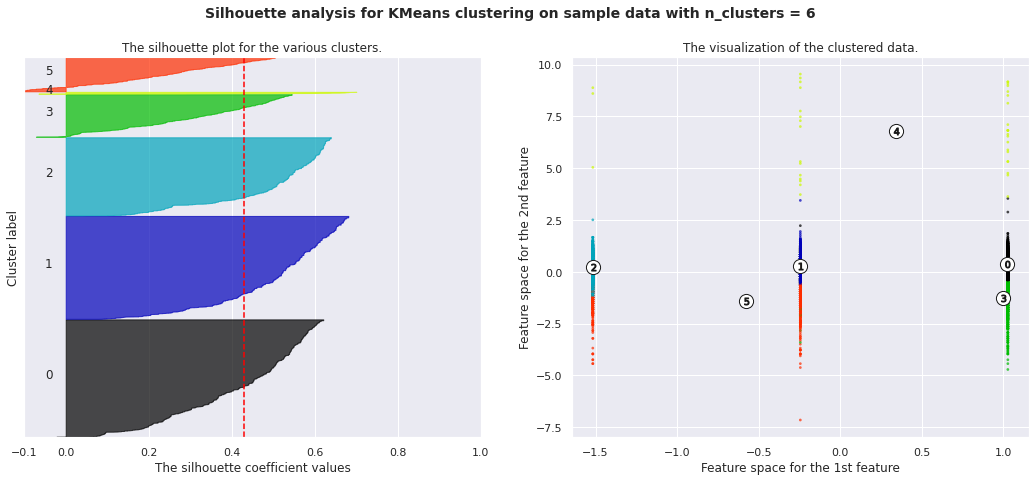

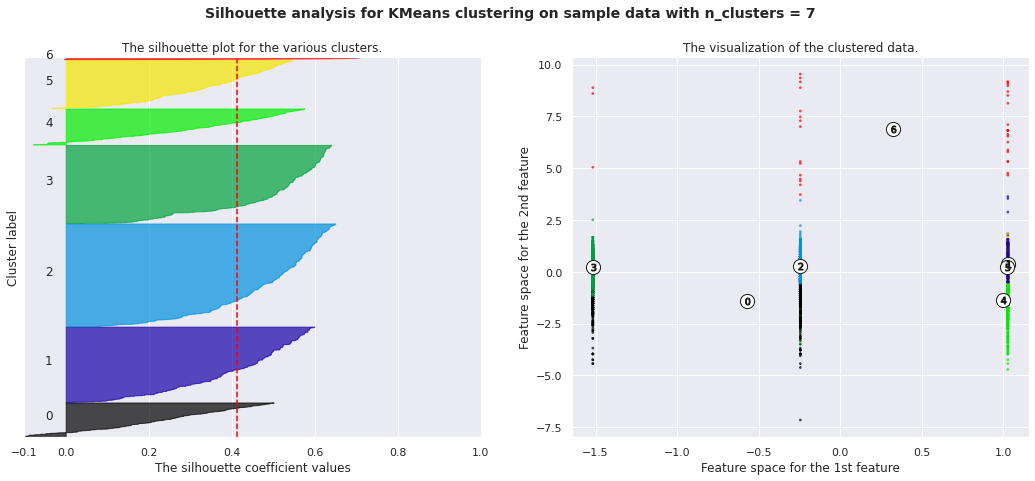

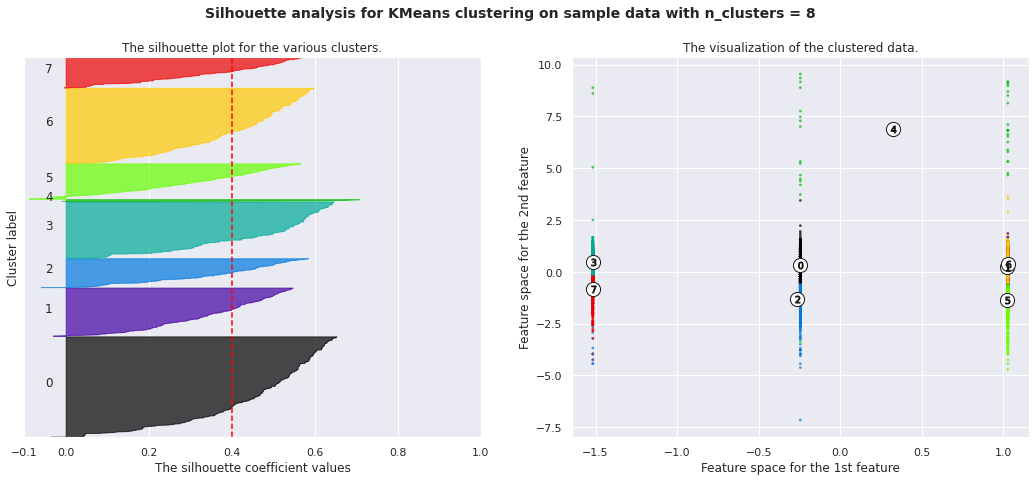

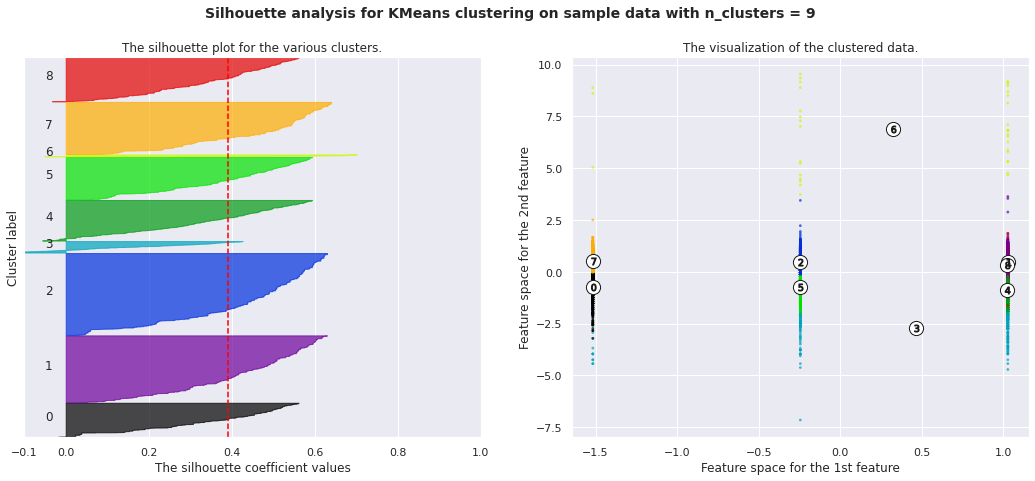

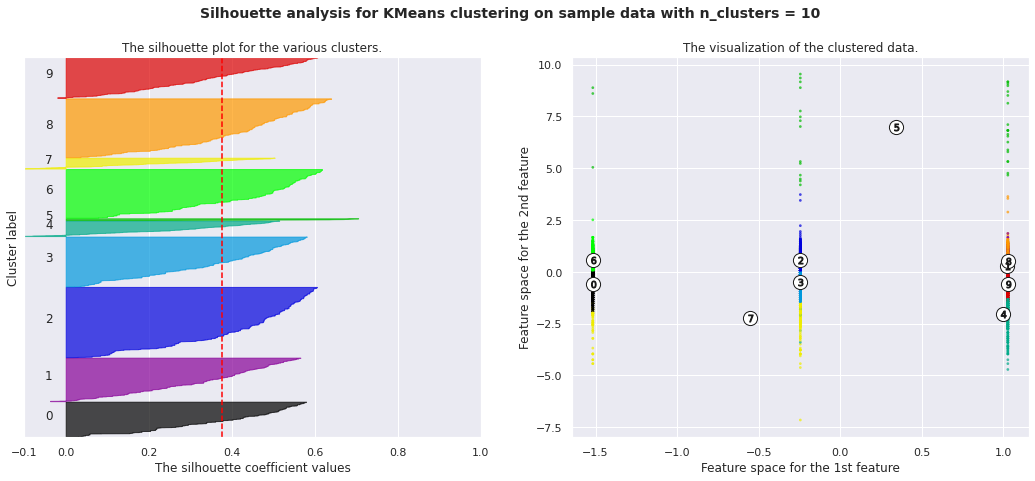

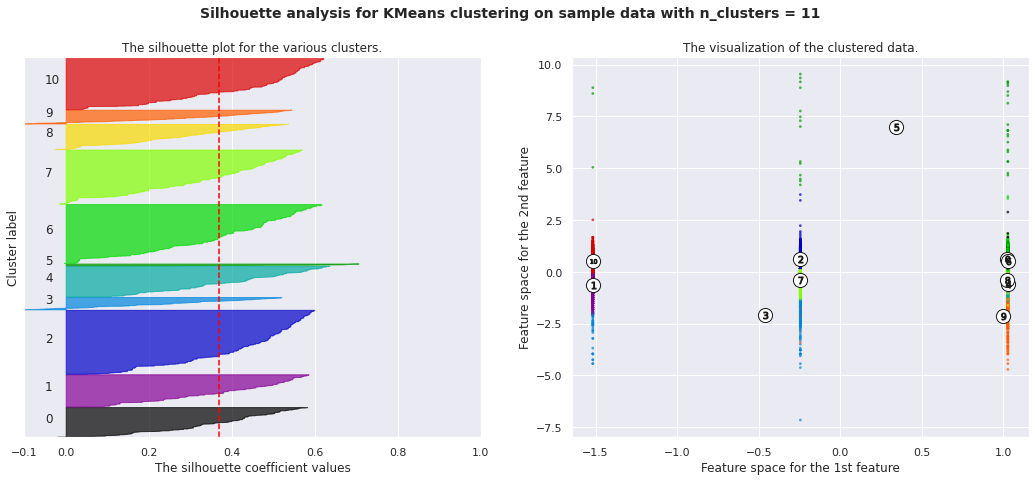

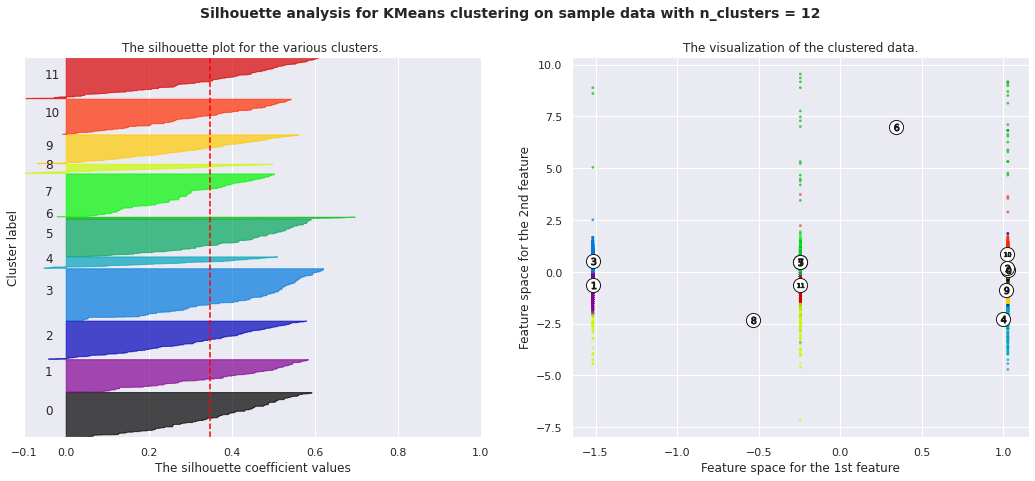

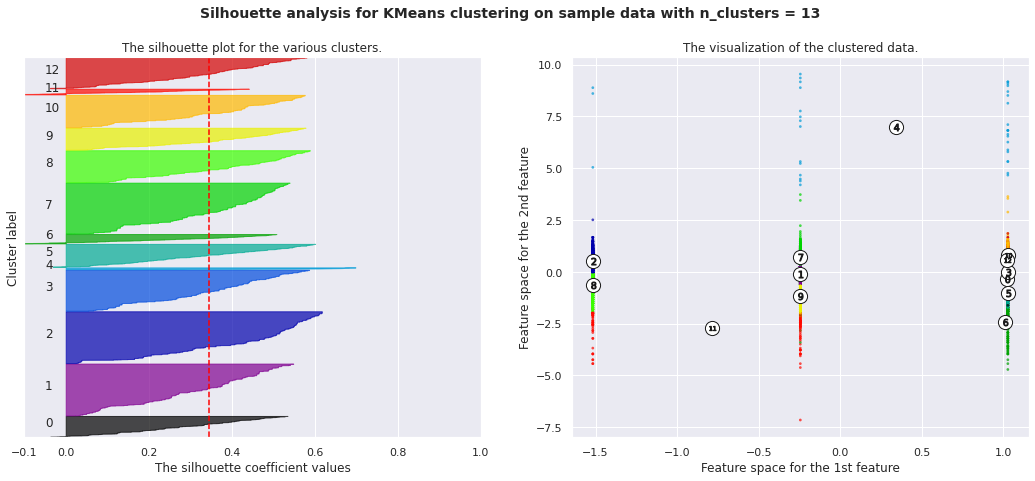

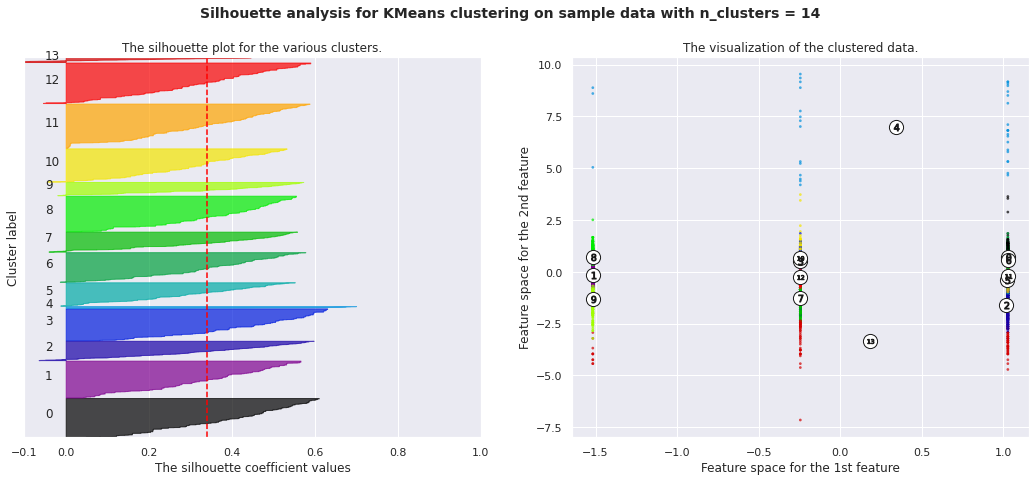

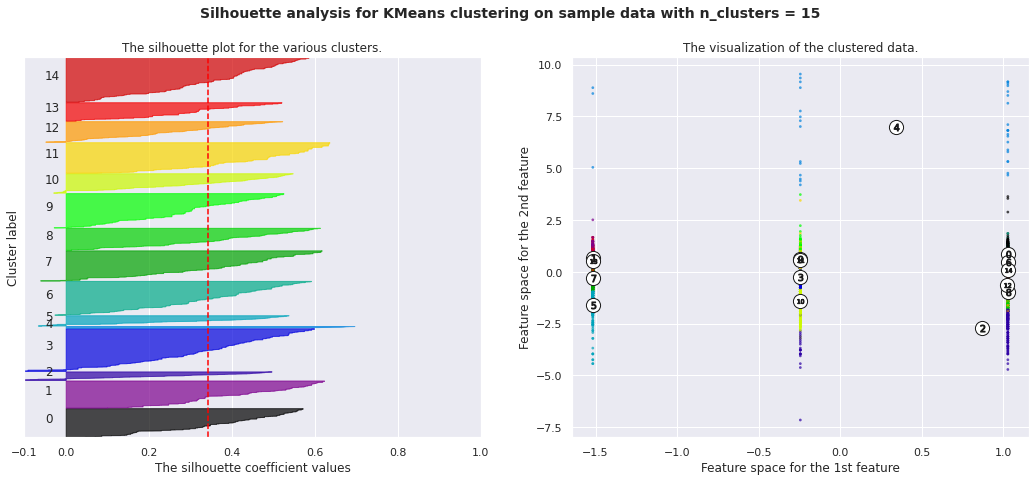

In [ ]:

range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:<br>
* Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
<br>
* Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

<br>The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$.

* ### <b> 6.2 Elbow Method

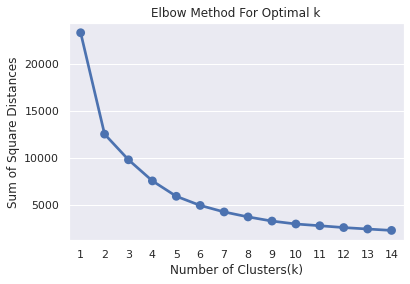

In [ ]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Will be using **3 clusters**

In [ ]:
kmeans = KMeans(n_clusters = 3 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

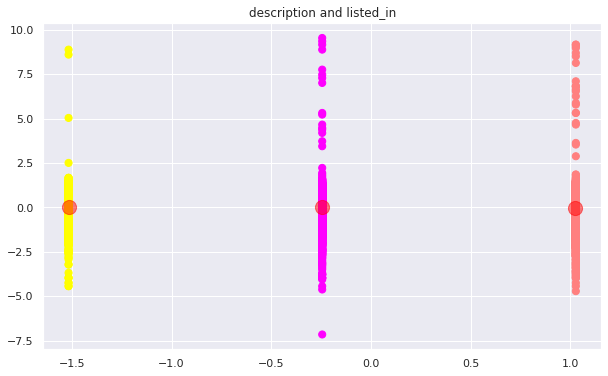

In [ ]:
plt.figure(figsize=(10 , 6))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

* ### <b>6.3 DBSCAN

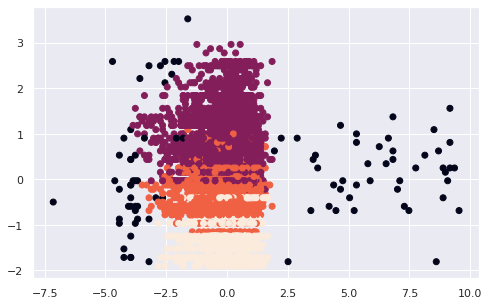

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=( 8 , 5 ))
plt.scatter(X[:,1], X[:,2], c=y_pred)

The black colour dots(*) are noise

* ### <b> 6.4 Agglomerative Clustering

In [ ]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

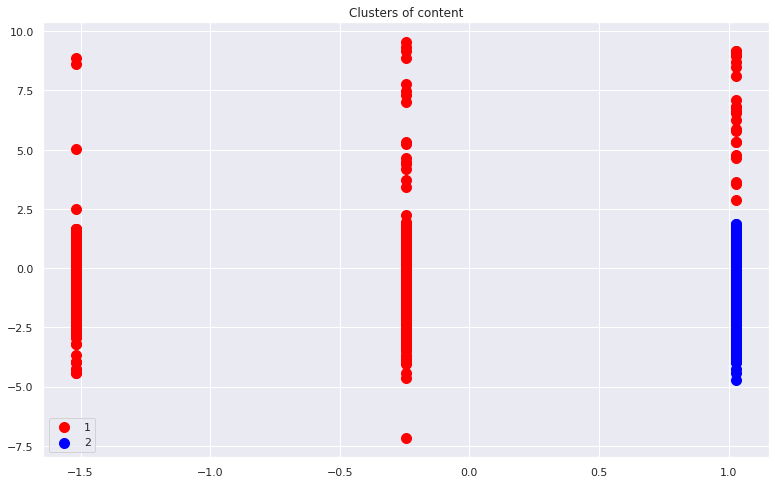

In [ ]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
# plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')

plt.title('Clusters of content')

plt.legend()
plt.show()

## <font size='+2' color = '#154085'> <B>Conclusion</b>

1. Director and cast contains a large number of null values so we will drop these 2 columns .
2. In this dataset there are two types of contents where 30.86% includes TV shows and the
remaining 69.14% carries Movies.
3. We have reached a conclusion from our analysis from the content added over years that
Netflix is focusing movies and TV shows (Fom 2016 data we get to know that Movies is
increased by 80% and TV shows is increased by 73% compare)
4. From the dataset insights we can conclude that the most number of TV Shows released in
2017 and for Movies it is 2020
5. On Netflix USA has the largest number of contents. And most of the countries preferred to
produce movies more than TV shows.
6. Most of the movies are belonging to 3 categories
7. TOP 3 content categories are International movies , dramas , comedies.
8. In text analysis (NLP) I used stop words, removed punctuations , stemming & TF-IDF
vectorizer and other functions of NLP.
9. Applied different clustering models like Kmeans, hierarchical, Agglomerative clustering,
DBSCAN on data we got the best cluster arrangements.
10.By applying different clustering algorithms to our dataset .we get the optimal number of
cluster is equal to 3
